In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#use seaborn plotting defaults
import seaborn as sns;sns.set()

# 1.hard margin svm
works when there is no outliar,i.e no consideration of error so it is hard
but real world data are not like that

# working with perfectly linear datasets

/home/nitin/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


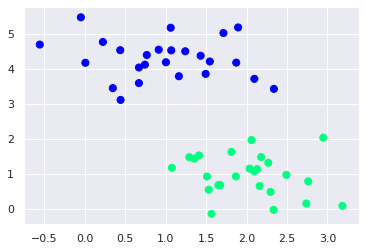

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X,y = make_blobs(n_samples=50,centers=2,
                 random_state=0,cluster_std=0.60)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='winter')

In [3]:
print(X[:,0],X[:,1])

[ 1.41281595  1.81336135  1.43289271  1.87271752  2.09517785  2.73890793
  3.18515794  2.06156753  2.03835818 -0.04749204  1.71444449  0.22459286
  1.06923853  1.53278923  1.4949318   1.1641107   0.74387399  2.29667251
  0.44359863  0.91433877  1.67467427  2.26908736  1.5108885   1.65179125
  2.49272186  2.33812285  0.67047877 -0.55552381  2.16172321  2.09680487
  2.18023251  0.43899014  1.24258802  0.00793137  1.89593761  1.868336
  2.13141478  1.06269622  2.33466499  0.669787    1.07714851  1.54632313
  1.56737975  1.35617762  1.00372519  1.29297652  2.94821884  0.3471383
  2.76253526  0.76752279] [ 1.5303347   1.6311307   4.37679234  4.18069237  1.0791468   0.15676817
  0.08900822  1.96918596  1.15466278  5.47425256  5.02521524  4.77028154
  4.53068484  0.55035386  3.85848832  3.79132988  4.12240568  0.48677761
  3.11530945  4.55014643  0.68001896  1.32160756  0.9288309   0.68193176
  0.97505341  3.43116792  4.04094275  4.69595848  0.6565951   3.7174206
  1.48364708  4.53592883  4.5

In [4]:
from sklearn.svm import SVC # "Support Vector Classifier",HERE WE CHOOSED LINEAR KERNEL,SVM ALSO WORKS 
#WITH NON-LINEAR. 
model=SVC(kernel='linear',C=1)
model.fit(X,y)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [5]:
def plot_svc_decision_function(model,ax=None,plot_support=True):
    """plot the decision function for a 2D SVC"""
    if ax is None:
        ax=plt.gca()
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()
    
    # create grid to evaluate model
    x=np.linspace(xlim[0],xlim[1],30)
    y=np.linspace(ylim[0],ylim[1],30)
    Y,X=np.meshgrid(y,x)
    xy=np.vstack([X.ravel(),Y.ravel()]).T
    P=model.decision_function(xy).reshape(X.shape)
    
    #plot decision boundary and margins
    ax.contour(X,Y,P, colors='k',
               levels=[-1,0,1],alpha=0.5,
               linestyles=['--','--','--'])
    
    #plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                   model.support_vectors_[:,1],
                   s=300, linewidth=1,facecolors='none');
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)

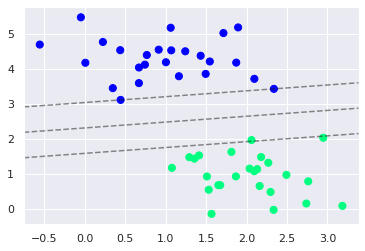

In [6]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='winter')
plot_svc_decision_function(model);

# The importance of support vectors

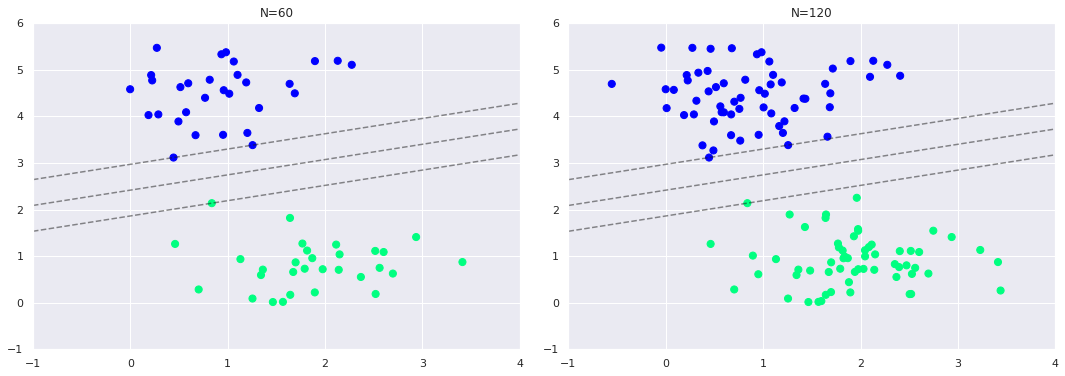

In [30]:
def plot_svm(N=10,ax=None):                            #HERE WE HAVE TAKEN 60 AND 120 DATA SETS TO SHOW THE 
                                                       #IMPORTANCE OF SUPPORT VECTORS,I.E EVEN WE ARE INCREASING 
                                                       #DATA THE SUPPORT VECTORS ARE DOING THERE WORK,I.E MODEL IS
                                                       #BEHAVING SAME,THIS IS THE POWER OF SVM.
    X,y=make_blobs(n_samples=200,centers=2,
                   random_state=0,cluster_std=0.60)
    X=X[:N]
    y=y[:N]
    model = SVC(kernel='linear',C=1E10)
    model.fit(X,y)
    
    ax=ax or plt.gca()
    ax.scatter(X[:,0],X[:,1],c=y,s=50,cmap='winter')
    ax.set_xlim(-1,4)
    ax.set_ylim(-1,6)
    plot_svc_decision_function(model,ax)
 
fig,ax=plt.subplots(1,2,figsize=(16,6))
fig.subplots_adjust(left=0.0625,right=0.95,wspace=0.1)
for axi,N in zip(ax,[60,120]):
    plot_svm(N,axi)
    axi.set_title('N={0}'.format(N))

# working with almost linearly separable dataset

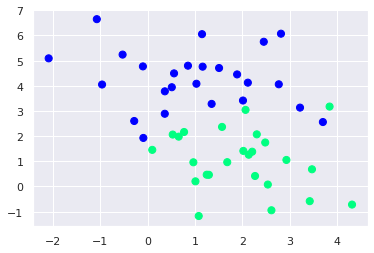

In [8]:
from sklearn.datasets.samples_generator import make_blobs
X,y = make_blobs(n_samples=50,centers=2,
                 random_state=0,cluster_std=1.2)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='winter');

we know the svm has two errors margin error(the big the margin the less the margin error) and classification error,and the say of classification error 
can be selected by c i.e classification hyper-parameter,so here we have taken two values of c 10 and 0.1.

when c=10 we are commanding that reduce classification error even the margin is not big,and we can see that here the margin is not big but classification is perfect.

when c=0.1 we are commanding that irrespective of classification error ensure that the margin is big,and we can see that here the margin is big but classification is not perfect.i.e there are errors.
 

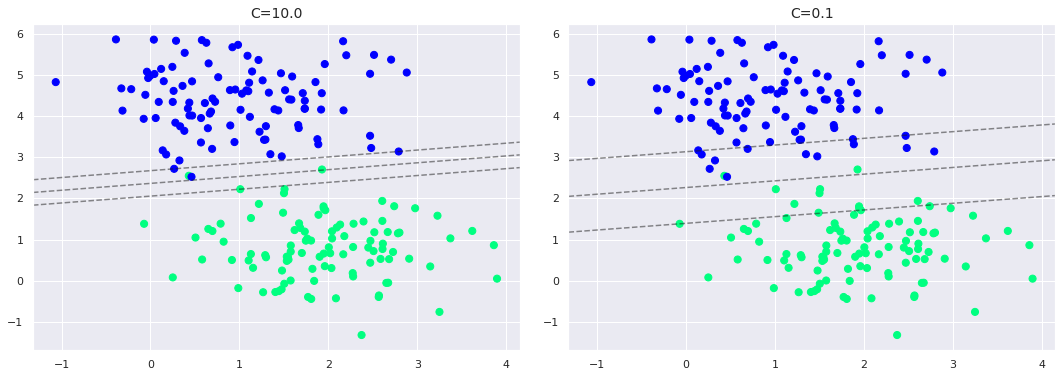

In [9]:
                                                    #
X,y=make_blobs(n_samples=200,centers=2,
               random_state=0,cluster_std=0.8)
 
fig,ax=plt.subplots(1,2,figsize=(16,6))
fig.subplots_adjust(left=0.0625,right=0.95,wspace=0.1)
for axi,C in zip(ax,[10,0.1]):
    model = SVC(kernel='linear',C=C)
    model.fit(X,y)
    axi.scatter(X[:,0],X[:,1],c=y,s=50,cmap='winter')
    plot_svc_decision_function(model,axi)
    axi.scatter(model.support_vectors_[:,0],
                model.support_vectors_[:,1],
                s=300,lw=1,facecolors='none');
    axi.set_title('C={0:.1f}'.format(C),size=14)

# applying kernel

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

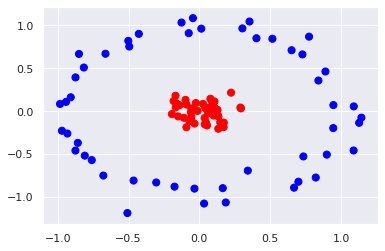

In [11]:
from sklearn.datasets.samples_generator import make_circles
X,y=make_circles(100,factor=.1,noise=.1)

plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='bwr')

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)


In [13]:
classifier=SVC(kernel="linear")#HERE INITIALLY WE MENTION LINEAR MODEL.
classifier.fit(X_train,y_train.ravel())
y_pred=classifier.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.5

the accuracy is only 70% because on a non linear data we have applied a linear model,NOW BY PLOTTING DECISION BOUNDARY WE CAN ACTUALLY UNDERSTAND HOW MY LINEAR MODEL HAS CLASSIFIED THE DATA.

In [15]:
zero_one_colourmap=ListedColormap(('blue','red'))
def plot_decision_boundary(X,y,clf):
    X_set,y_set=X,y
    X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,
                                stop =X_set[:,0].max()+1,
                                step=0.01),
                     np.arange(start=X_set[:,1].min()-1,
                                stop =X_set[:,1].max()+1,
                                step=0.01))
    
    plt.contourf(X1,X2,clf.predict(np.array([X1.ravel(),
                                            X2.ravel()]).T).reshape(X1.shape),
                alpha=0.75,
                cmap=zero_one_colourmap)
    plt.xlim(X1.min(),X1.max())
    plt.ylim(X2.min(),X2.max())
    for i,j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
                   c=(zero_one_colourmap)(i),label=j)
    
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


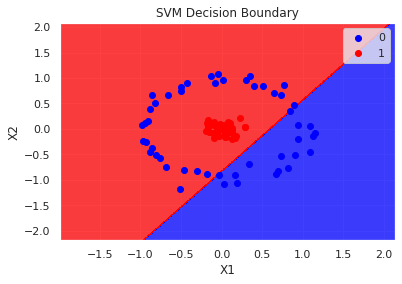

In [16]:
plot_decision_boundary(X,y,classifier)

THE ABOVE FIGURE SHOW THAT ONLY 70% OF DATA HAS BEEN CLASSIFIED CORRECTLY,NOW VISUALIZING MY DATA IN 3d.

In [17]:
def plot_3d_plot(X,y):
    r=np.exp(-(X**2).sum(1))        #it is radial basis function
    ax=plt.subplot(projection='3d')
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=100,cmap='bwr') #X[:,0]is x co-ordinate,X[:,1] is y co-ordinate.
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax
             

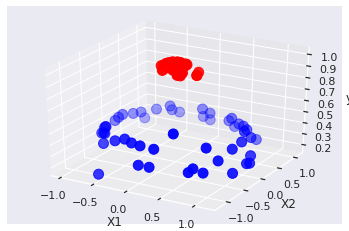

In [18]:
plot_3d_plot(X,y)

NOW APPLYING NON-LINEAR MODEL I.E RBF FUNCTION TO MY DATASET.

In [19]:
rbf_classifier=SVC(kernel="rbf")
rbf_classifier.fit(X_train,y_train)
y_pred=rbf_classifier.predict(X_test)

In [20]:
accuracy_score(y_test,y_pred)

1.0

see the magic we got the accuracy score of 100%.NOW AGAIN BY PLOTTING DECISION BOUNDARY WE CAN ACTUALLY UNDERSTAND HOW MY NON LINEAR MODEL HAS CLASSIFIED THE DATA.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


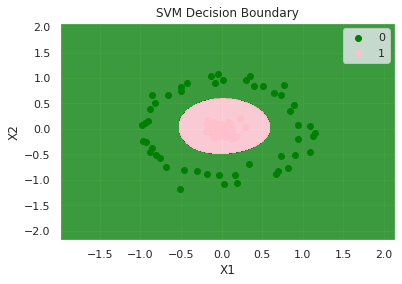

In [21]:
zero_one_colourmap=ListedColormap(('green','pink'))
plot_decision_boundary(X,y,rbf_classifier)

NOW APPLYING ANOTHER NON-LINEAR MODEL I.E POLYNOMIAL FUNCTION TO MY DATASET.

In [22]:
poly_classifier=SVC(kernel="poly")
poly_classifier.fit(X_train,y_train)
y_pred=poly_classifier.predict(X_test)

In [23]:
accuracy_score(y_test,y_pred)

0.65

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


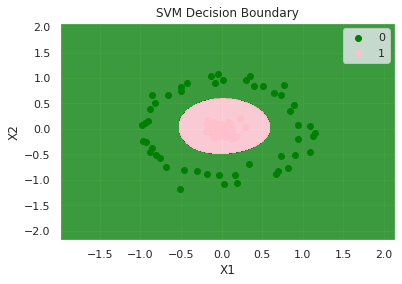

In [24]:
zero_one_colourmap=ListedColormap(('green','pink'))
plot_decision_boundary(X,y,rbf_classifier)

NOW VISUALIZING MY SOLUTION IN 2D.

In [25]:
X #this is our random 100 x and y coordinates which we have taken

array([[ 1.72204383e-01, -1.33099508e-01],
       [ 4.15197710e-02,  3.48928310e-02],
       [-6.78435049e-01, -7.50396535e-01],
       [ 4.49714889e-02, -1.25287519e-01],
       [-7.13456714e-02, -1.15003976e-01],
       [-9.08666568e-01,  1.62172716e-01],
       [ 8.99565958e-01, -5.06288066e-01],
       [ 3.28803064e-02, -1.07670495e+00],
       [ 6.05644873e-02,  3.86894941e-02],
       [ 6.99028234e-01, -8.22190944e-01],
       [-1.62117510e-01,  9.12767913e-02],
       [-9.42134633e-01,  1.08547928e-01],
       [ 1.14389389e+00, -7.55442722e-02],
       [ 1.06284702e-01,  1.13128426e-01],
       [ 3.53762941e-01,  1.04526047e+00],
       [ 9.45158677e-01, -1.96806763e-01],
       [ 7.34008953e-01, -5.27703914e-01],
       [-8.75108000e-01,  3.93762757e-01],
       [-8.50518351e-01,  6.67268744e-01],
       [ 1.27635553e-01, -4.55860820e-02],
       [ 6.50884478e-01,  7.10628532e-01],
       [-5.70425636e-02, -1.03931719e-01],
       [ 1.09010471e+00,  5.57272670e-02],
       [ 1.

In [26]:
#putting my X in the function
np.exp(-(X**2))

array([[0.97078103, 0.98244052],
       [0.99827759, 0.99878323],
       [0.63111062, 0.56944393],
       [0.99797961, 0.98442559],
       [0.99492273, 0.98686116],
       [0.43793931, 0.97404284],
       [0.44520568, 0.7738884 ],
       [0.99891947, 0.31370772],
       [0.99633866, 0.99850424],
       [0.61345984, 0.50864856],
       [0.97406028, 0.99170316],
       [0.41163524, 0.98828649],
       [0.27022692, 0.99430932],
       [0.98876713, 0.98728351],
       [0.88236611, 0.33535371],
       [0.40929262, 0.96200763],
       [0.58346597, 0.7569399 ],
       [0.4649553 , 0.85637312],
       [0.4851091 , 0.64066564],
       [0.98384114, 0.99792407],
       [0.65465258, 0.60350985],
       [0.99675143, 0.98925633],
       [0.30473026, 0.99689929],
       [0.99982716, 0.39622311],
       [0.99365969, 0.99957882],
       [0.88987972, 0.61876411],
       [0.99159714, 0.9656239 ],
       [0.91111868, 0.50130751],
       [0.97320328, 0.44721782],
       [0.987938  , 0.99995206],
       [0.

In [27]:
np.exp(-(X**2)).sum(1)#by doing this we got 100 z coordinates

array([1.95322154, 1.99706082, 1.20055455, 1.9824052 , 1.98178389,
       1.41198216, 1.21909407, 1.31262719, 1.9948429 , 1.12210841,
       1.96576344, 1.39992173, 1.26453624, 1.97605063, 1.21771982,
       1.37130025, 1.34040587, 1.32132842, 1.12577474, 1.98176521,
       1.25816243, 1.98600776, 1.30162955, 1.39605027, 1.99323851,
       1.50864382, 1.95722104, 1.41242619, 1.4204211 , 1.98789006,
       1.28267665, 1.25725676, 1.26042289, 1.40357986, 1.97539293,
       1.27642774, 1.37244751, 1.98701471, 1.99604179, 1.97050241,
       1.01917267, 1.93988425, 1.99035433, 1.4308709 , 1.30600397,
       1.99029026, 1.35347062, 1.30624595, 1.97564632, 1.96179024,
       1.97824441, 1.97314963, 1.27456021, 1.99565057, 1.97388281,
       1.09142465, 1.28754344, 1.99901407, 1.99300905, 1.28555829,
       1.01652933, 1.99279499, 1.98730131, 1.26202096, 1.43141823,
       1.99041482, 1.90564077, 1.91651002, 1.28386633, 1.23432544,
       1.98359554, 1.05902279, 1.3278895 , 1.93717486, 1.32567

In [28]:
X_new=np.exp(-(X**2))

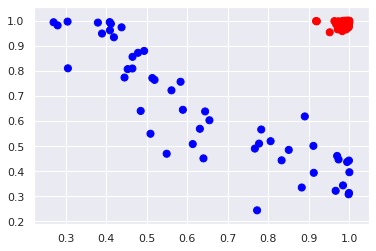

In [29]:
#plotting X_new
plt.scatter(X_new[:,0],X_new[:,1],c=y,s=50,cmap='bwr')

hence,we got our solution in 2d